## Machine learning for Public Policy
### HW1
#### Takuya Ando

### Problem1: Data Acquisition and Analysis

1. Download reported crime data from the Chicago open data portal for 2017 and 2018.

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import requests
import pandas as pd

In [15]:
# Download 2017 and 2018 data from the Chicago open data portal

url1 = "https://data.cityofchicago.org/api/views/d62x-nvdr/rows.csv?accessType=DOWNLOAD"
r1 = requests.get(url1)
with open('crime2017.csv', mode='w') as f1:
    f1.write(r1.text)

url2 = "https://data.cityofchicago.org/api/views/3i3m-jwuy/rows.csv?accessType=DOWNLOAD"
r2 = requests.get(url2)
with open('crime2018.csv', mode='w') as f2:
    f2.write(r2.text)

In [16]:
## Construct dataframe using downloaded CSV data 
crm17 = pd.read_csv("crime2017.csv")
crm18 = pd.read_csv("crime2018.csv")

2. Generate summary statistics for the crime reports data including but not limited to number of crimes of each type, how they change over time, and how they are different by neighborhood. Please use a combination of tables and graphs to present these summary stats. 

In [17]:
crm17_types = crm17.groupby('Primary Type')
num_crm17 = crm17_types.size()
num_crm17

Primary Type
ARSON                                  444
ASSAULT                              19303
BATTERY                              49214
BURGLARY                             13001
CONCEALED CARRY LICENSE VIOLATION       69
CRIM SEXUAL ASSAULT                   1628
CRIMINAL DAMAGE                      29042
CRIMINAL TRESPASS                     6812
DECEPTIVE PRACTICE                   19025
GAMBLING                               191
HOMICIDE                               676
HUMAN TRAFFICKING                        9
INTERFERENCE WITH PUBLIC OFFICER      1086
INTIMIDATION                           151
KIDNAPPING                             190
LIQUOR LAW VIOLATION                   191
MOTOR VEHICLE THEFT                  11406
NARCOTICS                            11658
NON-CRIMINAL                            38
NON-CRIMINAL (SUBJECT SPECIFIED)         2
OBSCENITY                               87
OFFENSE INVOLVING CHILDREN            2269
OTHER NARCOTIC VIOLATION                1

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

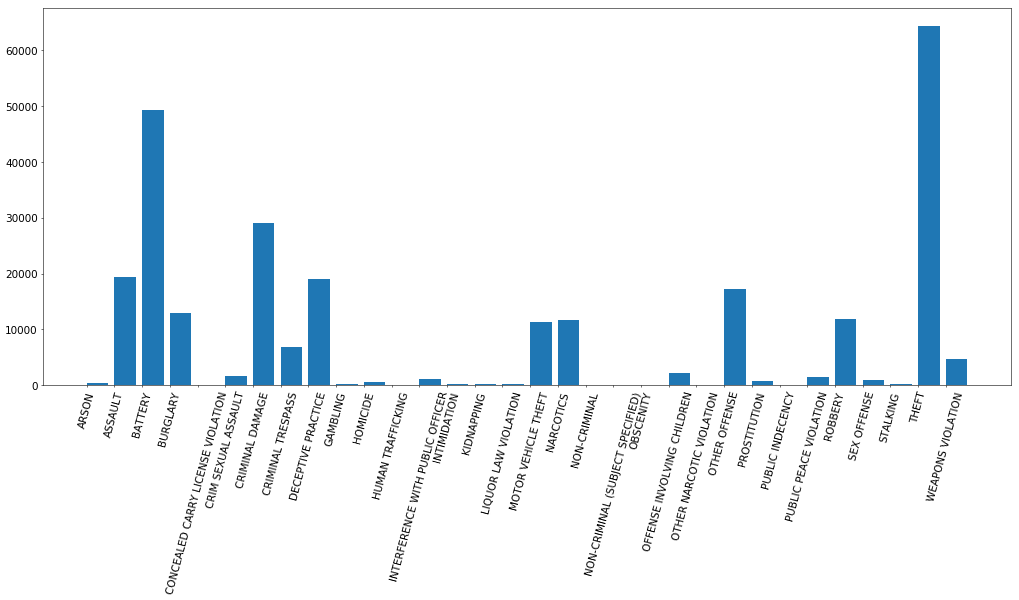

In [18]:
# left = np.array(range(32))
left = np.linspace(0, 32, 32)
height17 = np.array(crm17_types.size())
label = num_crm17.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height17, width=0.8, tick_label=label, align="edge")
plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15)

In [19]:
crm18_types = crm18.groupby('Primary Type')
num_crm18 = crm18_types.size()
num_crm18

Primary Type
ARSON                                  372
ASSAULT                              20377
BATTERY                              49781
BURGLARY                             11729
CONCEALED CARRY LICENSE VIOLATION      149
CRIM SEXUAL ASSAULT                   1627
CRIMINAL DAMAGE                      27806
CRIMINAL TRESPASS                     6904
DECEPTIVE PRACTICE                   18716
GAMBLING                               201
HOMICIDE                               586
HUMAN TRAFFICKING                       14
INTERFERENCE WITH PUBLIC OFFICER      1305
INTIMIDATION                           168
KIDNAPPING                             169
LIQUOR LAW VIOLATION                   267
MOTOR VEHICLE THEFT                   9987
NARCOTICS                            12987
NON-CRIMINAL                            37
NON-CRIMINAL (SUBJECT SPECIFIED)         3
OBSCENITY                               86
OFFENSE INVOLVING CHILDREN            2230
OTHER NARCOTIC VIOLATION                 

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

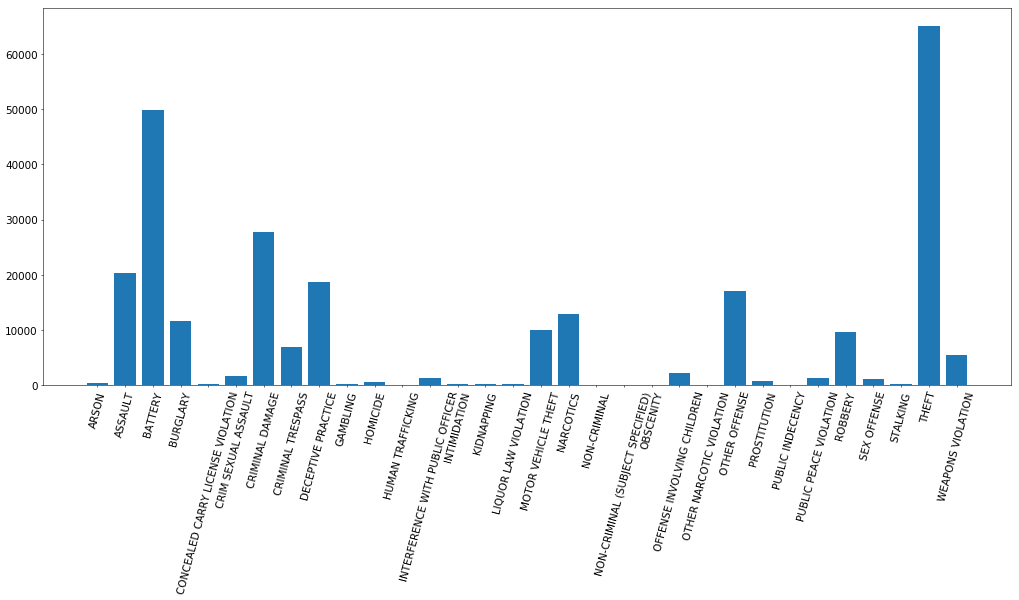

In [20]:
left = np.linspace(0, 32, 32)
height18 = np.array(crm18_types.size())
label = num_crm18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height18, width=0.8, tick_label = label)
plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15)

In the below code chunk, I define the function *loglike_calc* that takes in function *fn*, x values (in numpy vector format)*xvals*, mean variable *mu*, and standard deviation variable *sig*.

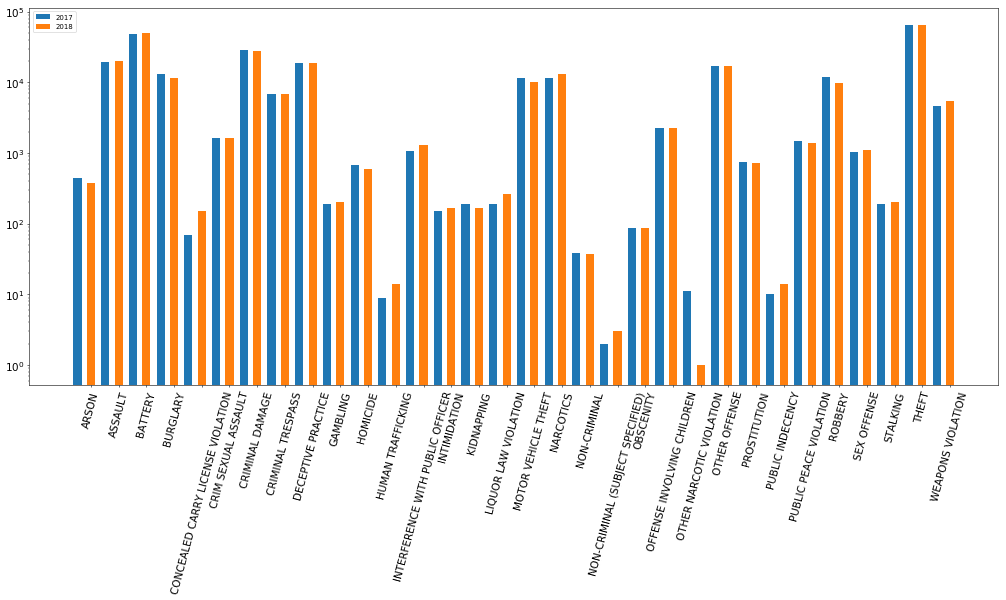

In [21]:
left1 =  np.linspace(0, 64, 32)
left2 =  np.linspace(1, 65, 32)
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left1, height17, width=0.6,label="2017", tick_label=label, log=True)
plt.bar(left2, height18, width=0.6,label="2018", tick_label=label, log=True)
plt.xticks(fontsize=15, rotation=75)
plt.yticks(fontsize=15)
plt.legend(loc=2)

Given $\mu=11.0$ and $\sigma=0.5$, the log likelihood is found to be approximately $-2385.857$. On the other hand, that with $\mu=11.35$ and $\sigma=0.5$ is found to be approximately $-2242.253$, which certainly seems to perform better than the given set of parameters.

#### Problem 1-(c)

In the below code chunk, I have created the function *crit_lognormal* for returning the negative of log likelihood given some parameters as well as x values. This will serve as the criterion function for determining the values of $\mu$ and $\sigma$ that maximize log likelihood (i.e. that are maximum-likelihood estimates).

In [22]:
crm17_area = crm17.groupby("Community Area")
crm17_area.size()

Community Area
0         1
1      4148
2      3592
3      3565
4      1999
5      1425
6      5746
7      4476
8     12311
9       275
10     1104
11     1058
12      547
13      967
14     2480
15     3371
16     3008
17     1516
18      608
19     4605
20     1505
21     2348
22     5064
23     8055
24     8324
25    15385
26     5368
27     4758
28     9049
29     9066
      ...  
48     1364
49     6951
50     1097
51     1754
52     1217
53     3995
54     1351
55      672
56     1925
57      849
58     2218
59     1052
60     1515
61     4645
62     1017
63     2306
64      897
65     1873
66     5752
67     6950
68     5939
69     6482
70     2510
71     7527
72      898
73     3086
74      585
75     2115
76     1685
77     2637
Length: 78, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text yticklabel objects>)

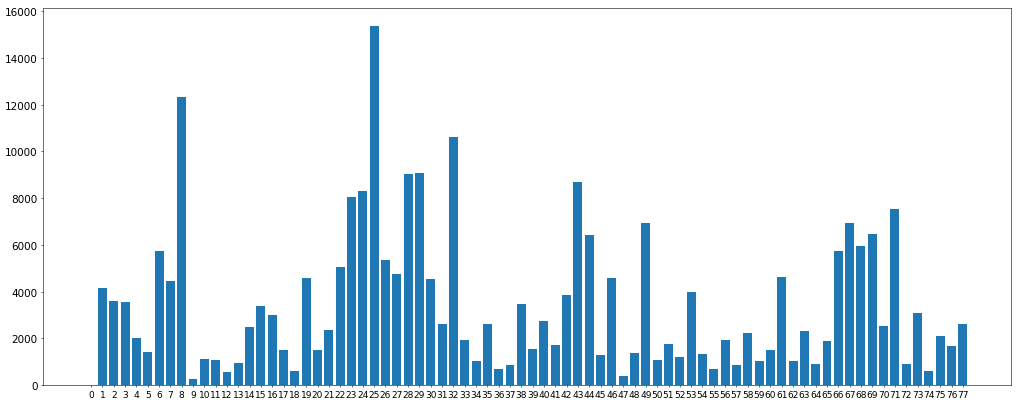

In [23]:
left = np.linspace(0, 78, 78)
height_area = np.array(crm17_area.size())
label = crm17_area.size().index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_area, width=0.8, tick_label=label)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

We can certainly check below that log likelihood for MLE approach certainly is higher than the two previous ones that we had examined.

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

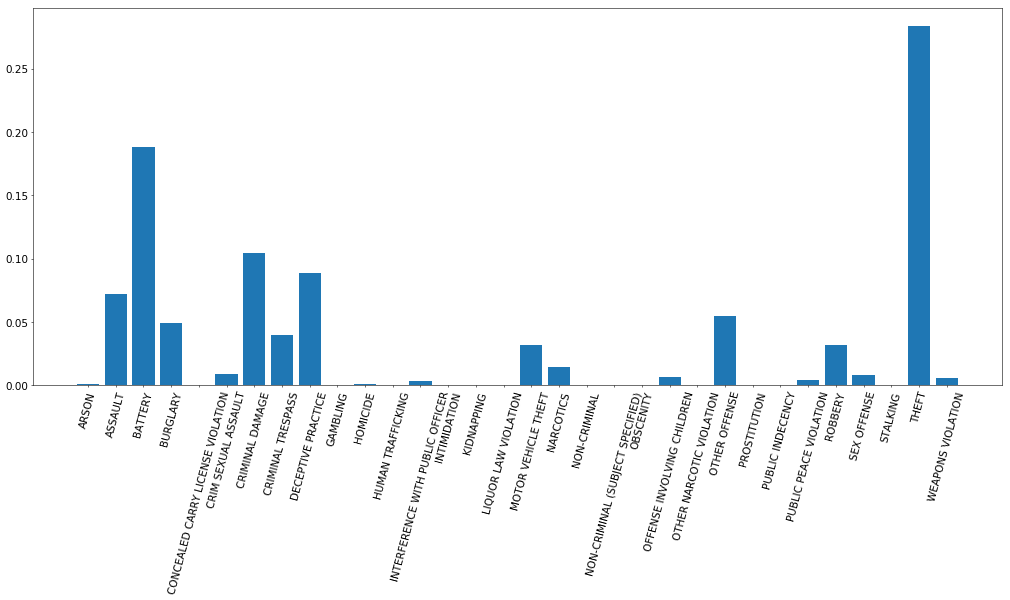

In [24]:
north18 = crm18[crm18['Community Area'].isin([1, 77, 3])]
north18_type = north18.groupby("Primary Type")
num_north18 = north18_type.size()
num_north18 = num_north18 / num_north18.sum()
types = crm18["Primary Type"].unique()
for type in types:
    if type not in num_north18.index:
        num_north18[type] = 0
num_north18.sort_index(inplace=True)
height_north = np.array(num_north18)
left = np.arange(len(height_north))
label = num_north18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_north, width=0.8)
plt.xticks(left, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text yticklabel objects>)

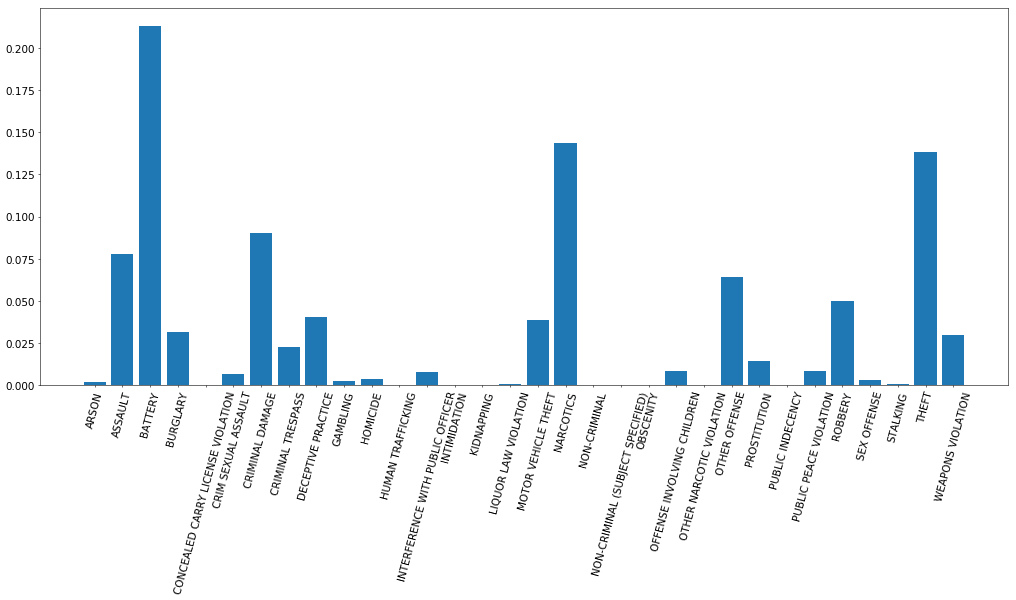

In [25]:
west18 = crm18[crm18['Community Area'].isin([23, 25, 26])]
west18_type = west18.groupby("Primary Type")
num_west18 = west18_type.size()
num_west18 = num_west18 / num_west18.sum()
types = crm18["Primary Type"].unique()
for type in types:
    if type not in num_west18.index:
        num_west18[type] = 0
num_west18.sort_index(inplace=True)
height_west = np.array(num_west18)
left = np.arange(len(height_west))
label = num_west18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_west, width=0.8)
plt.xticks(left, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

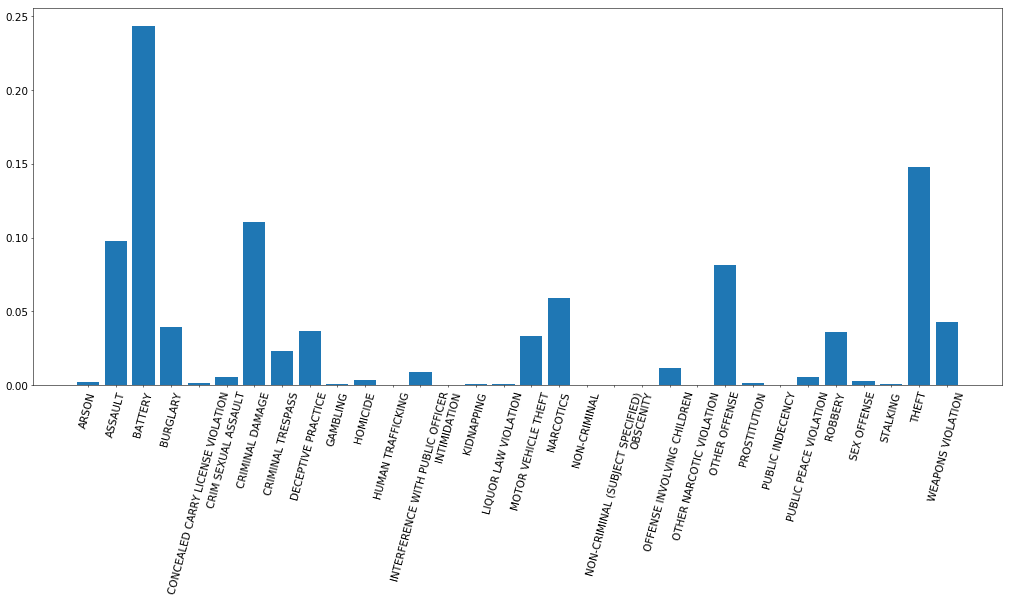

In [64]:
south18 = crm18[crm18['Community Area'].isin([67, 68, 69])]
south18_type = south18.groupby("Primary Type")
num_south18 = south18_type.size()
num_south18 = num_south18 / num_south18.sum()
types = crm18["Primary Type"].unique()
for type in types:
    if type not in num_south18.index:
        num_south18[type] = 0
num_south18.sort_index(inplace=True)
height_south = np.array(num_south18)
left = np.arange(len(height_south))
label = num_south18.index
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_south, width=0.8)
plt.xticks(left, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)

I compared the proportion of crimes in north, west and south areas. As we can see in the bar graph below, the overall tendency in the type of crime is similar in three areas, but there are some remarkable difference. For exanmple, in north area, theft is by far the most observed crime in 2018. Although theft also recorded high proportion in west and south area, battery recorded highest numbers in west and south. In addition, drug related crime(narcotics) is more frequent in west and south(especially in south) and deceptive practice is highest in north. From these facts, we can infer that in west and south area, violent or physical related crimes happens more frequently and, in north area, we are more likely to observe offeces against prorperties.

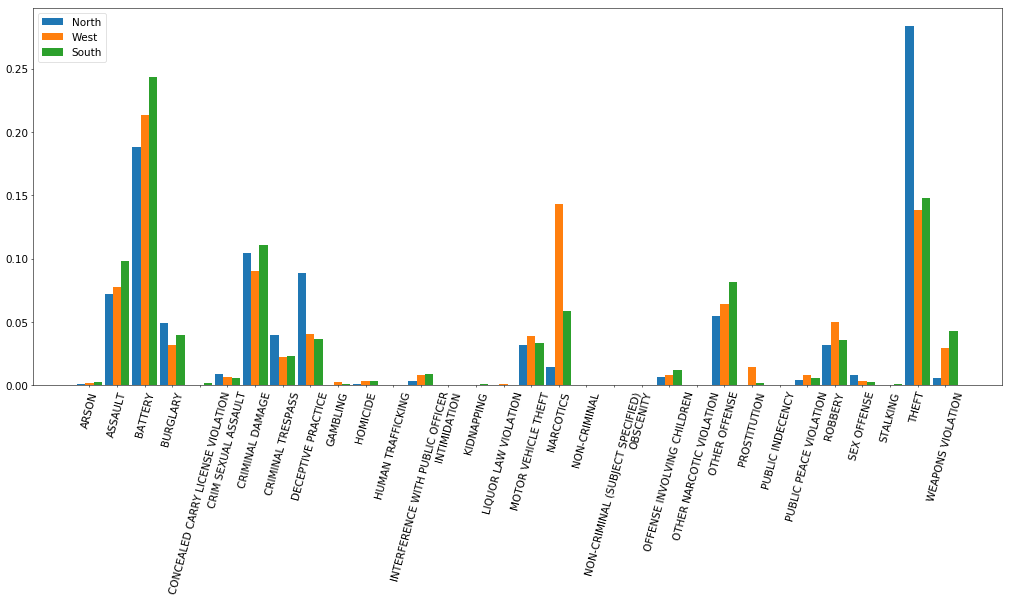

In [65]:
width = 0.3
plt.figure(figsize=(25, 10), dpi=50)
plt.bar(left, height_north,label="North", width=width)
plt.bar(left+width, height_west, label="West", width=width)
plt.bar(left+width*2, height_south, label="South", width=width)
plt.xticks(left+width, label, fontsize=15, rotation=75)
plt.yticks(fontsize=15)
plt.legend(loc=2, fontsize=15)

### Problem 2: Data Augmentation and APIs

In [ ]:
blk_lst= []
for s in crm17["Block"]:
    blk_lst.append(s.split())
blk_lst

In [ ]:
url = "https://geocoding.geo.census.gov/geocoder/geographies/address?street=55+W+BELMONT+AVE&city=Chicago&state=IL&benchmark=Public_AR_Census2010&vintage=Census2010_Census2010&layers=14&format=json"
r = requests.get(url)
data = json.loads(r.text)
data

In [ ]:
import json
api = "https://geocoding.geo.census.gov/geocoder/locations/address?street={0[0]}+{0[1]}+{0[2]}+{0[3]}&city=Chicago&state=IL&benchmark=Public_AR_Current&format=json"
# blk = blk_lst[0]
# url = api.format(blk)
# r = requests.get(url)
# data = json.loads(r.text)
# data
# # int(data["result"]["addressMatches"][0]["addressComponents"]["zip"])
zip_lst = []
for blk in blk_lst:
    url = api.format(blk)
    r = requests.get(url)
    data = json.loads(r.text)
    match_add = data["result"]["addressMatches"] 
    if len(match_add) != 0:
        zip_lst.append(int(match_add[0]["addressComponents"]["zip"]))
    else:
        zip_lst.append(None)
zip_lst

#### Problem 1-(e)

In the below code chunks, I have presented two ways -- numerical integration via the trapezoid method and directly calculating the CDF of log-normal distribution -- of calculating the percentages for earning more than 100,000 dollars and less than 75,000 dollars. The percentages are found to be approximately 22.99% for the former, and 26.02% for the latter.

In [29]:
import geopandas as gpd
from shapely.geometry import Point
geom = crm17.apply(lambda x : Point([x['Longitude'],x['Latitude']]),axis=1)
crm17 = gpd.GeoDataFrame(crm17, geometry=geom) #geom is a Series
crm17.crs = {'init':'epsg:4326'}
print (crm17.head())

         ID Case Number                    Date                   Block  IUCR  \
0  11094370    JA440032  09/21/2017 12:15:00 AM  072XX N CALIFORNIA AVE  1122   
1  11118031    JA470589  10/12/2017 07:14:00 PM       055XX W GRAND AVE  1345   
2  11134189    JA491697  10/30/2017 11:52:00 AM      043XX S TALMAN AVE  4651   
3  11156462    JA521389  09/29/2017 06:45:00 PM     055XX W BELMONT AVE  1110   
4  11164874    JA531910  12/01/2017 06:20:00 AM     022XX W CHICAGO AVE   265   

          Primary Type                     Description  \
0   DECEPTIVE PRACTICE               COUNTERFEIT CHECK   
1      CRIMINAL DAMAGE     TO CITY OF CHICAGO PROPERTY   
2        OTHER OFFENSE  SEX OFFENDER: FAIL REG NEW ADD   
3   DECEPTIVE PRACTICE                     BOGUS CHECK   
4  CRIM SEXUAL ASSAULT               AGGRAVATED: OTHER   

      Location Description  Arrest  Domestic  ...  Community Area  FBI Code  \
0        CURRENCY EXCHANGE    True     False  ...               2        10   
1  JAI

In [30]:
geojson_file = "Boundaries_Census_Tracts_2010.geojson"
tracts = gpd.read_file(geojson_file)[["tractce10","geometry"]]
print (tracts.head())

  tractce10                                           geometry
0    842400  (POLYGON ((-87.62404799998049 41.7302169999839...
1    840300  (POLYGON ((-87.6860799999848 41.82295600001154...
2    841100  (POLYGON ((-87.62934700001182 41.8527970000265...
3    841200  (POLYGON ((-87.68813499997718 41.8556909999909...
4    839000  (POLYGON ((-87.63312200003458 41.8744880000269...


In [46]:
crm17_tract = gpd.sjoin(crm17, tracts, op='within', how="left")
crm17_tract = crm17_tract.rename(columns = {"tractce10":"tract"}) 

In [ ]:
url = "https://api.census.gov/data/2017/acs/acs5?get=B25010_001E,NAME&for=tract:{}&in=state:17%20county:031&key=dd717cee49171cfa4782bd80647735f97cc7a33f"

data_lst = []
for i in crm17["tractce10"]:
    api = url.format(i)
    r = requests.get(url)
    data = json.loads(r.text)
    data_lst.append(data)
print(len(data_lst))

In [ ]:
url = "https://api.census.gov/data/2017/acs/acs5?get=B25010_001E,NAME&for=tract:020200&in=state:17%20county:031&key=dd717cee49171cfa4782bd80647735f97cc7a33f"
r = requests.get(url)
data = json.loads(r.text)
data

In [67]:
from census import Census
from us import states
c = Census("dd717cee49171cfa4782bd80647735f97cc7a33f")
income = c.acs5.state_county_tract("B19013_001E", "17", '031', Census.ALL)
income

[{'B19013_001E': 84863.0, 'state': '17', 'county': '031', 'tract': '561000'},
 {'B19013_001E': 57045.0, 'state': '17', 'county': '031', 'tract': '640100'},
 {'B19013_001E': 44063.0, 'state': '17', 'county': '031', 'tract': '630500'},
 {'B19013_001E': 24972.0, 'state': '17', 'county': '031', 'tract': '611100'},
 {'B19013_001E': 35016.0, 'state': '17', 'county': '031', 'tract': '611400'},
 {'B19013_001E': 42274.0, 'state': '17', 'county': '031', 'tract': '640600'},
 {'B19013_001E': 49135.0, 'state': '17', 'county': '031', 'tract': '650400'},
 {'B19013_001E': 40000.0, 'state': '17', 'county': '031', 'tract': '660500'},
 {'B19013_001E': 46050.0, 'state': '17', 'county': '031', 'tract': '661100'},
 {'B19013_001E': 14848.0, 'state': '17', 'county': '031', 'tract': '670600'},
 {'B19013_001E': 31923.0, 'state': '17', 'county': '031', 'tract': '690500'},
 {'B19013_001E': 49297.0, 'state': '17', 'county': '031', 'tract': '691000'},
 {'B19013_001E': 35581.0, 'state': '17', 'county': '031', 'tract

In [83]:
num_blk = c.acs5.state_county_tract("B02001_003E", "17", '031', Census.ALL)
num_blk

[{'B02001_003E': 51.0, 'state': '17', 'county': '031', 'tract': '561000'},
 {'B02001_003E': 61.0, 'state': '17', 'county': '031', 'tract': '640100'},
 {'B02001_003E': 110.0, 'state': '17', 'county': '031', 'tract': '630500'},
 {'B02001_003E': 346.0, 'state': '17', 'county': '031', 'tract': '611100'},
 {'B02001_003E': 88.0, 'state': '17', 'county': '031', 'tract': '611400'},
 {'B02001_003E': 50.0, 'state': '17', 'county': '031', 'tract': '640600'},
 {'B02001_003E': 571.0, 'state': '17', 'county': '031', 'tract': '650400'},
 {'B02001_003E': 394.0, 'state': '17', 'county': '031', 'tract': '660500'},
 {'B02001_003E': 2706.0, 'state': '17', 'county': '031', 'tract': '661100'},
 {'B02001_003E': 1039.0, 'state': '17', 'county': '031', 'tract': '670600'},
 {'B02001_003E': 732.0, 'state': '17', 'county': '031', 'tract': '690500'},
 {'B02001_003E': 2430.0, 'state': '17', 'county': '031', 'tract': '691000'},
 {'B02001_003E': 5284.0, 'state': '17', 'county': '031', 'tract': '710400'},
 {'B02001_00

In [85]:
num_all = c.acs5.state_county_tract("B02001_001E", "17", '031', Census.ALL)
num_all

[{'B02001_001E': 5541.0, 'state': '17', 'county': '031', 'tract': '561000'},
 {'B02001_001E': 1600.0, 'state': '17', 'county': '031', 'tract': '640100'},
 {'B02001_001E': 6464.0, 'state': '17', 'county': '031', 'tract': '630500'},
 {'B02001_001E': 2307.0, 'state': '17', 'county': '031', 'tract': '611100'},
 {'B02001_001E': 3298.0, 'state': '17', 'county': '031', 'tract': '611400'},
 {'B02001_001E': 4246.0, 'state': '17', 'county': '031', 'tract': '640600'},
 {'B02001_001E': 6979.0, 'state': '17', 'county': '031', 'tract': '650400'},
 {'B02001_001E': 5075.0, 'state': '17', 'county': '031', 'tract': '660500'},
 {'B02001_001E': 6544.0, 'state': '17', 'county': '031', 'tract': '661100'},
 {'B02001_001E': 1068.0, 'state': '17', 'county': '031', 'tract': '670600'},
 {'B02001_001E': 736.0, 'state': '17', 'county': '031', 'tract': '690500'},
 {'B02001_001E': 2444.0, 'state': '17', 'county': '031', 'tract': '691000'},
 {'B02001_001E': 5458.0, 'state': '17', 'county': '031', 'tract': '710400'},


In [77]:
family_size = c.acs5.state_county_tract("B25010_001E", "17", '031', Census.ALL)
family_size

[{'B25010_001E': 2.6, 'state': '17', 'county': '031', 'tract': '561000'},
 {'B25010_001E': 3.45, 'state': '17', 'county': '031', 'tract': '640100'},
 {'B25010_001E': 4.29, 'state': '17', 'county': '031', 'tract': '630500'},
 {'B25010_001E': 3.1, 'state': '17', 'county': '031', 'tract': '611100'},
 {'B25010_001E': 3.56, 'state': '17', 'county': '031', 'tract': '611400'},
 {'B25010_001E': 2.53, 'state': '17', 'county': '031', 'tract': '640600'},
 {'B25010_001E': 4.03, 'state': '17', 'county': '031', 'tract': '650400'},
 {'B25010_001E': 3.87, 'state': '17', 'county': '031', 'tract': '660500'},
 {'B25010_001E': 3.48, 'state': '17', 'county': '031', 'tract': '661100'},
 {'B25010_001E': 2.83, 'state': '17', 'county': '031', 'tract': '670600'},
 {'B25010_001E': 2.26, 'state': '17', 'county': '031', 'tract': '690500'},
 {'B25010_001E': 2.31, 'state': '17', 'county': '031', 'tract': '691000'},
 {'B25010_001E': 2.99, 'state': '17', 'county': '031', 'tract': '710400'},
 {'B25010_001E': 2.57, 'sta

In [68]:
income_df = pd.io.json.json_normalize(income)
income_df = income_df.rename(columns = {"B19013_001E":"med_inc"})
income_df = income_df.replace(-666666666.0, None)

In [78]:
family_size_df = pd.io.json.json_normalize(family_size)
family_size_df = family_size_df.rename(columns = {"B25010_001E":"fam_size"}) 
family_size_df = family_size_df.replace(-666666666.0, None)

In [88]:
num_blk_df = pd.io.json.json_normalize(num_blk)
num_blk_df = num_blk_df.rename(columns = {"B02001_003E":"num_blk"})
num_all_df = pd.io.json.json_normalize(num_all)
num_all_df = num_all_df.rename(columns = {"B02001_001E":"num_all"}) 
num_blk_df["per_blk"] = num_blk_df["num_blk"] / num_all_df["num_all"]
blk_df = num_blk_df

In [89]:
crm17_tract_m1 = pd.merge(crm17_tract, family_size_df[["fam_size", "tract"]], on = "tract", how = "left")
crm17_tract_m2 = pd.merge(crm17_tract_m1, income_df[["med_inc", "tract"]], on = "tract", how = "left")
crm17_tract_m3 = pd.merge(crm17_tract_m2, blk_df[["per_blk", "tract"]], on = "tract", how = "left")
auged_crm17 = crm17_tract_m3
auged_crm17.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,geometry,index_right,tract,fam_size,med_inc,per_blk
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)",POINT (-87.69971411 42.0122934),366.0,020200,3.15,87835.0,0.143374
1,11118031,JA470589,10/12/2017 07:14:00 PM,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,...,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)",POINT (-87.76551062999999 41.91871165),316.0,191200,3.87,44167.0,0.018528
2,11134189,JA491697,10/30/2017 11:52:00 AM,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,...,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)",POINT (-87.6907267 41.81466978),652.0,580600,3.77,42360.0,0.013781
3,11156462,JA521389,09/29/2017 06:45:00 PM,055XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,...,03/01/2018 03:52:35 PM,41.938581,-87.765831,"(41.938581442, -87.765830579)",POINT (-87.76583058 41.93858144),312.0,190300,3.07,46010.0,0.018484
4,11164874,JA531910,12/01/2017 06:20:00 AM,022XX W CHICAGO AVE,265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,...,03/01/2018 03:52:35 PM,41.895805,-87.683159,"(41.895805099, -87.683159355)",POINT (-87.68315936 41.8958051),559.0,242900,2.04,67500.0,0.083698


In [90]:
battery = auged_crm17["Primary Type"] == "BATTERY"
crm17_btr = auged_crm17[battery]
crm17_btr

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,geometry,index_right,tract,fam_size,med_inc,per_blk
26,10929491,JA244606,04/29/2017 11:38:00 PM,028XX W 21ST PL,496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,APARTMENT,True,False,...,02/12/2018 03:46:59 PM,41.852796,-87.696662,"(41.852796034, -87.696662196)",POINT (-87.69666219999999 41.85279603),214.0,840700,3.52,34219.0,0.046672
39,11126911,JA482268,10/23/2017 09:37:00 AM,019XX W CORTLAND ST,495,BATTERY,AGGRAVATED OF A SENIOR CITIZEN,STREET,True,False,...,02/13/2018 03:56:09 PM,41.915957,-87.676668,"(41.915957492, -87.676668385)",POINT (-87.67666839 41.91595749),189.0,831000,2.07,152794.0,0.031236
41,11145578,JA506751,11/10/2017 04:00:00 PM,013XX S KARLOV AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,02/13/2018 03:56:09 PM,41.863331,-87.727524,"(41.863330777, -87.727523713)",POINT (-87.72752371 41.86333078),762.0,290900,3.32,24071.0,0.993867
42,11146097,JA507458,11/11/2017 02:30:00 AM,056XX S GREEN ST,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,APARTMENT,True,True,...,02/13/2018 03:56:09 PM,41.791975,-87.646311,"(41.791975485, -87.64631068)",POINT (-87.64631068 41.79197549),116.0,834700,3.05,21802.0,0.840389
43,11151046,JA513954,11/16/2017 12:00:00 PM,013XX S KARLOV AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,ALLEY,True,True,...,02/13/2018 03:56:09 PM,41.863331,-87.727524,"(41.863330777, -87.727523713)",POINT (-87.72752371 41.86333078),762.0,290900,3.32,24071.0,0.993867
50,10817336,JA117586,01/16/2017 04:03:00 AM,026XX E 75TH ST,460,BATTERY,SIMPLE,STREET,False,False,...,02/10/2018 03:50:01 PM,41.759056,-87.561260,"(41.759055505, -87.561259676)",POINT (-87.56125968000001 41.75905551),254.0,431302,2.56,19756.0,0.976208
73,11162829,JA529201,11/29/2017 05:30:00 AM,047XX N WHIPPLE ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,False,...,02/14/2018 03:49:00 PM,41.967264,-87.704768,"(41.967264235, -87.704767917)",POINT (-87.70476791999999 41.96726424),268.0,140800,2.62,69545.0,0.056324
76,10817338,JA117521,01/16/2017 12:40:00 AM,077XX S EAST END AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,02/10/2018 03:50:01 PM,41.754364,-87.583379,"(41.754363819, -87.583378637)",POINT (-87.58337864000001 41.75436382),199.0,834200,2.42,33835.0,0.976566
87,10809005,JA107338,01/07/2017 01:59:00 PM,015XX S HARDING AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,02/10/2018 03:50:01 PM,41.859894,-87.723768,"(41.859894302, -87.723767741)",POINT (-87.72376774 41.8598943),32.0,838700,3.07,22742.0,0.924638
88,10809008,JA107334,01/07/2017 01:25:00 PM,043XX W MAYPOLE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,02/10/2018 03:50:01 PM,41.884574,-87.734789,"(41.884573706, -87.734788966)",POINT (-87.73478897 41.88457371),628.0,260300,2.89,30234.0,0.985471


1. What types of blocks have reports of "Battery"?

I examined what kind of blocks(census tract area) are likely to have "Battery" reports by constructing histograms for each added variable(family income, family size and percentage of black people). From the graphs below, it is clear that in low-income areas, there are more reports of battery. It is plausible that violent crime happens more frequently than in wealthy areas. Regarding black percentage, as I expected, highest number of battery was recorded in the area where most of the residents are black people. However, areas with very small number black people also recorded lots of batteries.

Text(0, 0.5, 'Number of Battery')

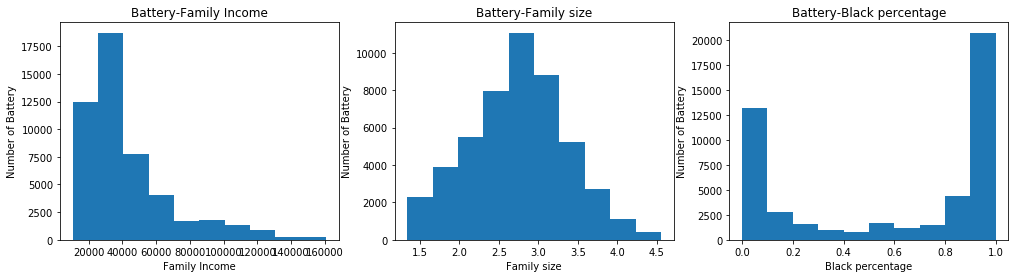

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(17,4))
ax1.hist(crm17_btr["med_inc"], bins=10)
ax1.set_title('Battery-Family Income')
ax1.set_xlabel('Family Income')
ax1.set_ylabel('Number of Battery')

ax2.hist(crm17_btr["fam_size"], bins=10)
ax2.set_title('Battery-Family size')
ax2.set_xlabel('Family size')
ax2.set_ylabel('Number of Battery')

ax3.hist(crm17_btr["per_blk"], bins=10)
ax3.set_title('Battery-Black percentage')
ax3.set_xlabel('Black percentage')
ax3.set_ylabel('Number of Battery')

Text(0, 0.5, 'Number of Homicide')

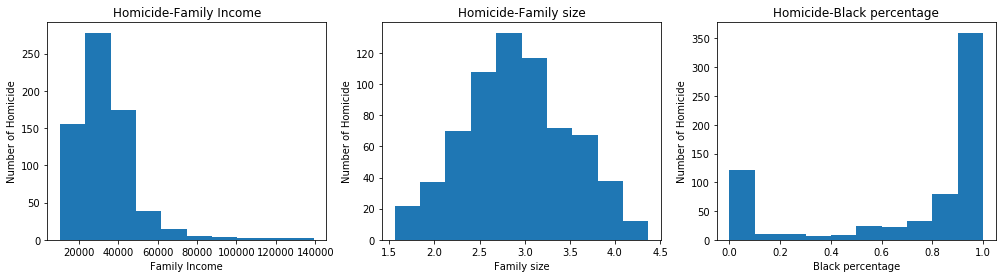

In [103]:
homicide = auged_crm17["Primary Type"] == "HOMICIDE"
crm17_hom = auged_crm17[homicide]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(17,4))
ax1.hist(crm17_hom["med_inc"], bins=10)
ax1.set_title('Homicide-Family Income')
ax1.set_xlabel('Family Income')
ax1.set_ylabel('Number of Homicide')

ax2.hist(crm17_hom["fam_size"], bins=10)
ax2.set_title('Homicide-Family size')
ax2.set_xlabel('Family size')
ax2.set_ylabel('Number of Homicide')

ax3.hist(crm17_hom["per_blk"], bins=10)
ax3.set_title('Homicide-Black percentage')
ax3.set_xlabel('Black percentage')
ax3.set_ylabel('Number of Homicide')

### Problem 2

#### Problem 2-(a)

To start, let us load the data and check out how the data is structured.

In [ ]:
### Loading in the data
sick_dat = pd.read_csv('sick.txt')
sick_dat[0:5] ## checking a few rows

To provide ourselves with a starting point for finding the maximum-likelihood estimates, let us use OLS to find the estimates for parameters.

In [ ]:
### trying the OLS first; first prepping the y and X
y_vals = sick_dat['sick']
x_mat = sick_dat[['age', 'children', 'avgtemp_winter']]

y_vals = np.array(y_vals)
x_mat = np.array(x_mat)

It seems that the OLS regression estimates are as follows: $\beta_0 \approx 0.252, \beta_1 \approx 0.013, \beta_2 \approx 0.400$, and $\beta_3 \approx -0.010$.

In [ ]:
reg = lin().fit(x_mat, y_vals)
base_coef = reg.coef_
base_intercept = reg.intercept_
print("Regression coefficients:", reg.coef_)
print("Regression intercept:", base_intercept)

Let us now use the below function *eps_creation* to find a vector (numpy array) of error terms (epsilons) and find the standard deviation for it. It seems that the error terms have a standard deviation of approximately $0.003$.

In [ ]:
def eps_creation(y, x1, x2, x3, b0, b1, b2, b3):
    
    epsilons = y - b0 - b1*x1 - b2*x2 - b3*x3
    
    return epsilons

In [ ]:
epsilons = eps_creation(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                        base_intercept, base_coef[0], base_coef[1], base_coef[2])

print("Standard deviation of the error terms is",'%.5f' % epsilons.std())

Now, let us use the below function *normalpdf* to draw the normal distribution which will be presented along with the histogram for the error terms.

In [ ]:
def normalpdf(x, mu, sig):
    
    sig = abs(sig)
    
    fracpart = 1 / ((2 * np.pi * (sig ** 2)) ** 0.5)
    expopart = (-1) * ((x - mu)**2)/(2*(sig**2))
    var = fracpart * (np.e ** expopart)

    return var

In [ ]:
## histogram
num_bins = 30
count, bins, ignored = plt.hist(epsilons, 
                                num_bins, normed=True,
                                edgecolor='k')

## normal distribution
lb, ub= np.min(epsilons), np.max(epsilons)
xspace = np.linspace(lb, ub, 1001)
norm_byone = normalpdf(xspace, 0, epsilons.std())
plt.plot(xspace, norm_byone, label='mu=0, sigma=0.003')
plt.title("Histogram of the error terms and normal distribution")
plt.ylabel(r'Density')
plt.xlabel(r'Errors')
plt.subplots_adjust(bottom=.25, left=.25)
plt.legend()
plt.show()

To create the log-likelihood for the normal distribution (as the error terms are assumed to be normally distributed), I use the function *ll_normal*. I admit that this function would not be suitable for those trying to use more or less than 3 regressors; in the future, I will fix this. But for now, this would be sufficient.

In [ ]:
def ll_normal(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    
    epsilons = eps_creation(y, x1, x2, x3, b0, b1, b2, b3)
    normal_densities = normalpdf(epsilons, 0, sigma)
    ln_densities = np.log(normal_densities)
    log_ll = np.sum(ln_densities)
    
    return log_ll

I also provide the criterion function that returns the negative of the log likelihood given the parameters and arguments.

In [ ]:
def crit_normal(params, *args):

    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    
    return -ll_normal(y, x1, x2, x3, b0, b1, b2, b3, sigma)

I use the initialization $(0.2, 0.01, 0.4, -0.01, 0.05)$ which are close to the OLS parameters. The below process, for some reason, has produced programming errors; however, the estimated (using MLE approach) coefficients are exactly the same as that of the OLS, which are $\beta_0 \approx 0.252, \beta_1 \approx 0.013, \beta_2 \approx 0.400$, and $\beta_3 \approx -0.010$. The value of the log likelihood is approximately $876.87$.

In [ ]:
## base_coef and base_intercept from OLS estimation
arguments = (y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2])
params_init2 = (0.2, 0.01, 0.4, -0.01, 0.05)

results_uncstr2 = opt.minimize(crit_normal, params_init2, arguments)
print(results_uncstr2.x)
print(-results_uncstr2.fun)

Below code presents the variance-covariance matrix. I admit that the printed version of the code output is quite hard to interpret, and therefore provide the cleaner, Latex version directly below.

\begin{bmatrix}
6.84\times10^{-7} &  8.08\times10^{-9} & -1.51\times10^{-7} & -1.65\times10^{-8} & 1.84\times 10^{-9} \\
8.08\times10^{-9} & 3.96\times10^{-9} & -3.52\times10^{-8} & -2.50\times10^{-9} & -1.37\times 10^{-10} \\
-1.51\times10^{-7} & -3.52\times10^{-8} & 3.58\times10^{-7} & 2.24\times10^{-8} & -6.99\times 10^{-11} \\
-1.65\times10^{-8} & -2.50\times10^{-9} & 2.24\times10^{-8} & 1.84\times10^{-9} & 9.79\times 10^{-11} \\
1.84\times10^{-9} & -1.37\times10^{-10} & -6.99\times10^{-11} & 9.79\times10^{-11} & 2.20\times 10^{-8}
\end{bmatrix}

In [ ]:
vcv_mle2 = results_uncstr2.hess_inv
print('Variance-Covariance Matrix of MLE:')
print(vcv_mle2)

#### Problem 2-(b)

Below presents the results of the likelihood ratio test; because the $p$-value is 0.0, we can reject the null hypothesis that the regressors have no effect on number of sick days. Moreover, such a likelihood is, once again, 0%.

In [ ]:
hyp_b0, hyp_b1, hyp_b2, hyp_b3, hyp_sigma = 1, 0, 0, 0, 0.1
mle_b0, mle_b1, mle_b2, mle_b3, mle_sigma = results_uncstr2.x

log_lik_h0 = ll_normal(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                       hyp_b0, hyp_b1, hyp_b2, hyp_b3, hyp_sigma)
print('hypothesis value log likelihood:', log_lik_h0)
print()
log_lik_mle = ll_normal(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                        mle_b0, mle_b1, mle_b2, mle_b3, mle_sigma)
print('MLE log likelihood:', log_lik_mle)
print()
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value:', LR_val)
print()
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value:', pval_h0)